#Chapter2 of Practical Statistics for Data SCientists

In [1]:
 import pandas as pd

In [2]:
player_data = pd.read_csv("players.csv")
player_data.head()

,nflId,height,weight,birthDate,collegeName,Position,displayName
0,42901,6-1,208,1992-07-25,James Madison,SS,Dean Marlowe
1,43501,6-0,220,1994-08-11,Central Michigan,FS,Kavon Frazier
2,43534,6-0,205,1993-06-02,Illinois,SS,Clayton Fejedelem
3,43535,6-1,235,1992-12-22,Temple,MLB,Tyler Matakevich
4,44174,6-1,236,1993-02-22,Texas Tech,ILB,Sam Eguavoen


In [3]:
player_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2732 entries, 0 to 2731
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   nflId        2732 non-null   int64 
 1   height       2732 non-null   object
 2   weight       2732 non-null   int64 
 3   birthDate    2715 non-null   object
 4   collegeName  2724 non-null   object
 5   Position     2732 non-null   object
 6   displayName  2732 non-null   object
dtypes: int64(2), object(5)
memory usage: 149.5+ KB


In [4]:
# Conerting height in feet "6-1" to inches using lambda function to note here typecasting fro height i.e object type in dataset
player_data["height_inches"] = player_data["height"].apply(lambda x: int(x.split("-")[0]) * 12 + 
                                                           int(x.split("-")[1]) if(len(x.split("-")) == 2) else int(x) )
player_data

,nflId,height,weight,birthDate,collegeName,Position,displayName,height_inches
0,42901,6-1,208,1992-07-25,James Madison,SS,Dean Marlowe,73
1,43501,6-0,220,1994-08-11,Central Michigan,FS,Kavon Frazier,72
2,43534,6-0,205,1993-06-02,Illinois,SS,Clayton Fejedelem,72
3,43535,6-1,235,1992-12-22,Temple,MLB,Tyler Matakevich,73
4,44174,6-1,236,1993-02-22,Texas Tech,ILB,Sam Eguavoen,73
...,...,...,...,...,...,...,...,...
2727,33216,6-3,320,06/16/1986,Central Florida,G,Josh Sitton,75
2728,33184,6-3,265,05/02/1985,Winston-Salem State,DE,William Hayes,75
2729,45651,5-9,198,06/16/1993,Iowa,WR,Riley McCarron,69
2730,41284,73,230,1992-10-20,LSU,RB,Jeremy Hill,73


Central Limit Theorm : The means drawn from multiple samples from the data when plotted,will resemble a bell shaped normalcurve. We can demonstrate this by taking the means of multiplesamples of 5 or 20 item and plotting them on a  histogram

Text(0.5, 1.0, 'Central limit theorm')

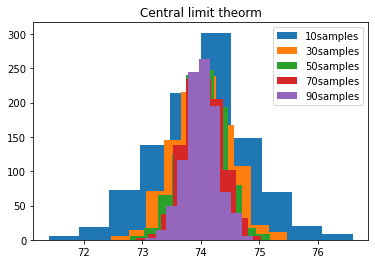

In [16]:
#Central Limit Theorm
import matplotlib.pyplot as plt
sample_amounts = range(10, 100, 20)

for x in sample_amounts:
    samples = [] 
    for i in range(1000):
        samples.append(player_data["height_inches"].sample(x).mean())
    plt.hist(samples)  
           
plt.legend([str(z) + "samples" for z in sample_amounts])
plt.title("Central limit theorm")  

Standard Error: single metric that sums up the variability in the smapling distribution for a statistic. you can estimate the standard error based on the standard deviation and the no of values in the sample n. standard error= s/root(n) . Sample size increases and the standard error decreases

In [10]:
#Standard Error
player_data["height_inches"].sem()

0.05065243293253027

In [7]:
# Bootstrapping: Drawing resamples from the data earlier selected again and again and append median of the sample taken
 #This  is a faulty code from book here the median from every 
#resample is coming as 74 . It may be due to the fact that median is 
#robust to outliers or may be some other reason find out later 

from sklearn.utils import resample

results = []
for nrepeat in range(1000):
    sample = resample(player_data["height_inches"])
    results.append(sample.median())  
    print(sample.median())
results = pd.Series(results)                      
print('Bootstrap Statistics:')
print(f'original: {player_data["height_inches"].median()}')
print(f'bias: {results.mean() - player_data["height_inches"].median()}')
print(f'std. error: {results.std()}')


74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0


In [29]:
#resample draws a different set of samples each time.Thus this code gives different result everytime
resample(player_data["height_inches"]).mean()

73.99743777452416

In [9]:
#Bootstrapping :here we have changed median to mean

from sklearn.utils import resample
results = []
for nrepeat in range(1000):
    sample = resample(player_data["height_inches"])
    results.append(sample.mean())   
results = pd.Series(results)                    
print('Bootstrap Statistics:')
print(f'original: {player_data["height_inches"].mean()}')
print(f'bias: {results.mean() - player_data["height_inches"].median()}')
print(f'std. error: {results.std()}')

Bootstrap Statistics:
original: 74.0106149341142
bias: 0.011416910688168969
std. error: 0.048786606224657636


#Note: When we take more larger dataset  we are shrinking the spread of the data around mean
#Confidence Level and confidence interval
#Confidence Interval = Point of estimate +/- Margin Of error
For more look at Krish Naik Statistics Live5 pdf

In [11]:
# confidence Interval, Student's T-distribution When we have less than 30 data in a sample we use t-distribution read more on google
import scipy.stats as st
import numpy as np

#define smaple data
data = player_data["height_inches"].sample(20)

#create 95% confidence interval for population mean weight
st.t.interval(alpha=0.95, df=len(data)-1, loc=np.mean(data), scale=st.sem(data)) 

(72.36767809607781, 75.13232190392219)

In [15]:
#Normal Distribution, Confidence Interval

#define smaple data
np.random.seed(0)
data = player_data["height_inches"].sample(1500)

#create 95% confidence interval for population mean weight
st.norm.interval(alpha=0.95, loc=np.mean(data), scale=st.sem(data)) 

(73.92590128473445, 74.19009871526556)

((array([-3.31270533, -3.05604344, -2.91334469, ...,  2.91334469,
          3.05604344,  3.31270533]),
  array([66, 66, 66, ..., 80, 81, 81], dtype=int64)),
 (2.614578288484803, 74.01, 0.9906040603250976))

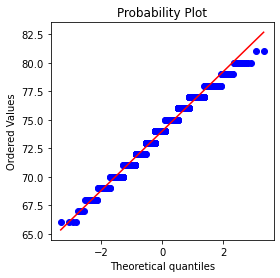

In [19]:
#Normal Distribution ,Q-Q Plot : it is used to determine if a distribution of values is close to normal distribution.
#iF qq plot is close to diagonal it is closer to normal distribution
#x axis has quantiles(percentiles) and y axis plots z-scores

import scipy.stats as st
fig, ax= plt.subplots(figsize=(4,4))

norm_sample = player_data["height_inches"].sample(1500)
st.probplot(norm_sample, plot=ax)

In [23]:
#PMF(Probability Mass Function) Read about them and if it is good for A/B testing both pmf cdf
st.binom.pmf(2, 5, p=0.1)

0.07289999999999992

In [22]:
#CDF(cumulative Distribution Fumction)
st.binom.cdf(2, 5, p=0.1)

0.99144